# Linear Regression

##### Examining the relationship between a player's pass volume and completion percentage

---

In [1]:
import requests
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

Same as in previous Notebook, but we're adding:
- `matplotlib.pyplot as plt`. which is the commonly-used convention for importing `matplotlib`

---

In [2]:
base_url = "https://raw.githubusercontent.com/statsbomb/open-data/master/data/"
comp_url = base_url + "matches/{}/{}.json"
match_url = base_url + "events/{}.json"

In [3]:
def parse_data(competition_id, season_id):
    matches = requests.get(url=comp_url.format(competition_id, season_id)).json()
    match_ids = [m['match_id'] for m in matches]

    all_events = []
    for match_id in tqdm(match_ids):

        events = requests.get(url=match_url.format(match_id)).json()
        passes = [x for x in events if x['type']['name'] == "Pass"]
        
        for a in passes:
            attributes = {
                "player_id": a['player']['id'],
                "outcome": 0 if 'outcome' in a['pass'].keys() else 1,
            }
            all_events.append(attributes)
            
    return pd.DataFrame(all_events)

The `parse_data` function has been adjusted such that `player_id` and `outcome` are the only attributes being collected.

The StatsBomb data has this weird quirk of only presenting an `outcome` key on event objects that are incomplete. This bit of code handles that:
`"outcome": 0 if 'outcome' in a['pass'].keys() else 1`

---

In [4]:
competition_id = 43
season_id = 3
df = parse_data(competition_id, season_id)

100%|██████████| 64/64 [00:16<00:00,  3.91it/s]


In [5]:
df.head(15)

,player_id,outcome
0,5535,1
1,5523,1
2,5529,1
3,5521,1
4,5738,1
5,5529,1
6,5518,1
7,5738,1
8,5530,1
9,3632,1


In [6]:
total_passes = df.groupby('player_id')['outcome'].sum()
percentage = df.groupby('player_id')['outcome'].mean()

In `Pandas` DataFrames, you can do some basic grouping and aggregation.

Here, we're grouping on `player_id`, and applying a `sum()` or a `mean()` to the `outcome` attribute.

---

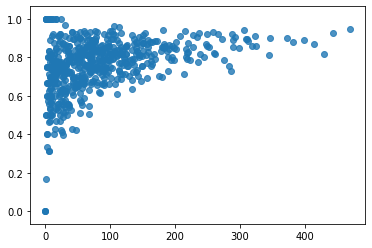

In [7]:
plt.scatter(total_passes, percentage, alpha=0.8)
plt.show()

This is a basic scatter plot via `Matplotlib`, with the x and y axes set to `total_passes` and `percentage`

`alpha=0.8` sets the opacity of each scatter point.

---

In [8]:
from sklearn.linear_model import LinearRegression

This imports LinearRegression from `scikit-learn`'s `linear_model` module.

---

In [9]:
model = LinearRegression()
fit = model.fit([[x] for x in total_passes], percentage)
print("Coefficients: {}".format(fit.coef_))
print("Intercept: {}".format(fit.intercept_))

Coefficients: [0.00063316]
Intercept: 0.709239569309592


This builds a LinearRegression model, and attempts to predict `percentage` with the features in the `total_passes` variable.

The list comprehension (`[[x] for x in total_passes]`) that surrounds `total_passes` is worth an explanation. Since `model.fit()` allows for multiple features, it requires a nested list as the first argument.

---

In [10]:
xfit = [0, 500] # This is the x-axis range of the chart
yfit = model.predict([[x] for x in xfit])

This builds the regression line such that it can be plotted in the next step.

---


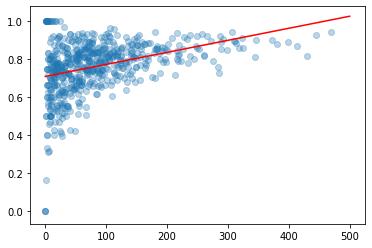

In [11]:
plt.scatter(total_passes, percentage, alpha=0.3)
plt.plot(xfit, yfit, 'r')
plt.show()

This plots the previous chart, but also overlays the calculated regression line in red. The color is adjusted with the `'r'` in the `plt.plot()` function.

---

Devin Pleuler 2020